# **2.1 Team Members**

Divya Jacob  
Nandhini Dhanasekaran

# **2.2 Problem Formulation/Introduction**
### 2.2.1 Introduction

Imagine the majesty and the iceberg that marked the "Titanic's" fate. A journey that began with 2,224 passengers, of whom 722 managed to survive and 1,502 ventured into the frigid depths as there were insufficient lifeboats to accommodate everyone onboard. The tales of tragedy and resiliency on that tragic night are revealed by the Titanic dataset from Kaggle. Come along on this data voyage with us as we explore the statistics and stories that show who survived the harsh seas and who perished based on some passenger informations such as their age, gender, socioeconomic status and so on. "Are you prepared to navigate the Titanic's data voyage?"

**Problem Statement**:  Create a prediction model that can predit if a passenger will survive or not based on their age, gender, socioeconomic status etc.

### 2.2.2 Data Population

The population includes all the passengers who were present on the Titanic during the time the ship sank.

# **2.3 Data**

### 2.3.1 Kaggle Account
https://www.kaggle.com/divyajacob123

### 2.3.2 Data loading and description

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/BigData/Project'

/content/drive/MyDrive/BigData/Project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/train.csv
./data/gender_submission.csv
./data/test.csv


In [4]:
train_file='./data/train.csv'
print(train_file, "======================\n")
with open(train_file, "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

./data/train.csv ======================

0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'


In [5]:
test_file='./data/test.csv'
print(test_file, "======================\n")
with open(test_file, "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

./data/test.csv ======================

0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'


In [6]:
gender_file='./data/gender_submission.csv'
print(gender_file, "======================\n")
with open(gender_file, "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

./data/gender_submission.csv ======================

0 	 'PassengerId,Survived\n'
1 	 '892,0\n'
2 	 '893,1\n'
3 	 '894,0\n'
4 	 '895,0\n'


train.csv consists of training data.
Each row includes information about passenger such as the passengerid, whether the passenger survived or not, the class in which they travelled, age, name and so on.

test.csv consists of test data. It includes the same fields as Train.csv with the difference being that it does not have the column Survived which has the information as to whether the passenger survived or not.

gender_submission.csv consists of a sample result format to be used for submission. It contains only the passenger id and whether the passenger survived or not.

### 2.3.3 Data Wrangling

In [7]:
# Load the training dataset into pandas
traindata = pd.read_csv('./data/train.csv')

# Obtaining the summary of dataframe's structure and content
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Get statistical info about the data
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Randomly selecting 10 rows from the dataframe
traindata.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S


The training dataset consists of 12 columns  
**PassengerId**: A unique identifier for each passenger on the Titanic  
**Survived**: 1 indicates that the passenger survived and 0 indicates that they died  
**Pclass**: The class in which the passenger was travelling in(1st, 2nd or 3rd)  
**Name**: The full name of the passenger  
**Age**: Age of the passenger   
**Sibsp**: Number of siblings / spouses aboard the Titanic  
**Parch**: Number of parents / children aboard the Titanic  
**Ticket**: Ticket number  
**Fare**: Cost of ticket    
**Cabin**: Cabin Number  
**Embarked**: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  


In [10]:
# Load the test dataset into pandas
testdata = pd.read_csv('./data/test.csv')

# Obtaining the summary of dataframe's structure and content
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# Get statistical info about the data
testdata.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
# Randomly selecting 10 rows from the dataframe testdata
testdata.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
163,1055,3,"Pearce, Mr. Ernest",male,NaN,0,0,343271,7.0000,NaN,S
345,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S
274,1166,3,"Saade, Mr. Jean Nassr",male,NaN,0,0,2676,7.2250,NaN,C
195,1087,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S
279,1171,2,"Oxenham, Mr. Percy Thomas",male,22.0,0,0,W./C. 14260,10.5000,NaN,S
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.7750,NaN,S
181,1073,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C
231,1123,1,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,NaN,S
86,978,3,"Barry, Miss. Julia",female,27.0,0,0,330844,7.8792,NaN,Q
303,1195,3,"Pokrnic, Mr. Tome",male,24.0,0,0,315092,8.6625,NaN,S


 **Structure**

The dataset is structured in a tabular format with rows representing individual passengers and columns representing various attributes such as passenger class, age, sex, and fare.

There are a total of 891 rows and 12 columns in the training dataset.

In [13]:
# Retrieve the dimensions of the dataframe traindata
traindata.shape

(891, 12)

There are a total of 418 rows and 11 columns in the test dataset.

In [14]:
# Retrieve the dimensions of the dataframe testdata
testdata.shape

(418, 11)

In [15]:
print(train_file, "is", os.path.getsize(train_file) / 1e6, "MB")

./data/train.csv is 0.061194 MB


In [16]:
with open(train_file, "r") as f:
    print(train_file, "is", sum(1 for l in f), "lines.")

./data/train.csv is 892 lines.


The file with the training data is comparatively small and the file name shows that it is in csv format. The file has 892 lines in it.

 **Granularity**

The granularity of the dataset is at the passenger level. Each row represents a single passenger and their corresponding attributes.

Grouping the passengers

In [17]:
traindata.groupby('PassengerId').nunique()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,1,1,1,1,1,1,1,0,1
888,1,1,1,1,1,1,1,1,1,1,1
889,1,1,1,1,0,1,1,1,1,0,1


In [18]:
testdata.groupby('PassengerId').nunique()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,1,1,1,1,1,1,1,1,0,1
893,1,1,1,1,1,1,1,1,0,1
894,1,1,1,1,1,1,1,1,0,1
895,1,1,1,1,1,1,1,1,0,1
896,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,1,1,1,0,1,1,1,1,0,1
1306,1,1,1,1,1,1,1,1,1,1
1307,1,1,1,1,1,1,1,1,0,1


Due to the fact that even after grouping and making each row unique, the number of rows remained the same as before, the findings above indicate that passengerId is the unique key for each row. It follows that each row contains information about a single passenger. Consequently, the granularity is observed from the data.

 **Scope**

 The scope of the dataset is limited to passengers aboard the Titanic. It does not include any information about crew members or other individuals who were not passengers on the ship. We are also given information of 891 passengers in the training dataset and 418 passengers in the test dataset, for a total of 1309 out of the 1317 passengers who were on the ship so we have data about about almost all the passengers onboard.


Text(0.5, 1.0, 'Relationship between Sex and Number of passengers survived')

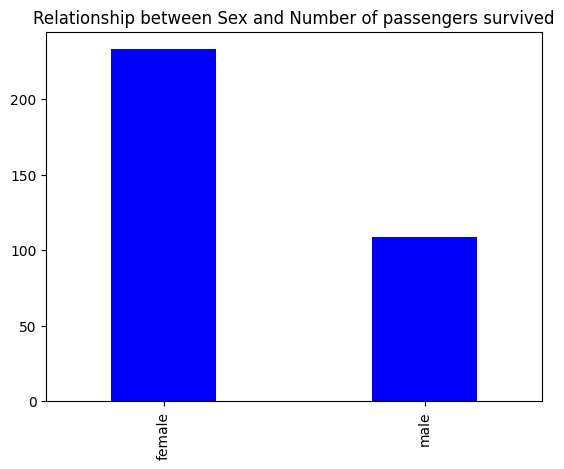

In [19]:
# Filtering to select passengers who survived
survived_passengers = traindata[traindata["Survived"] == 1]

# Counting the number of survivors by gender
survived_by_gender = survived_passengers["Sex"].value_counts()

# Plot the results
survived_by_gender.plot(kind="bar",x= 'Number of passengers survived',y='Gender of passenger',color='blue', width=0.4)
plt.title('Relationship between Sex and Number of passengers survived')

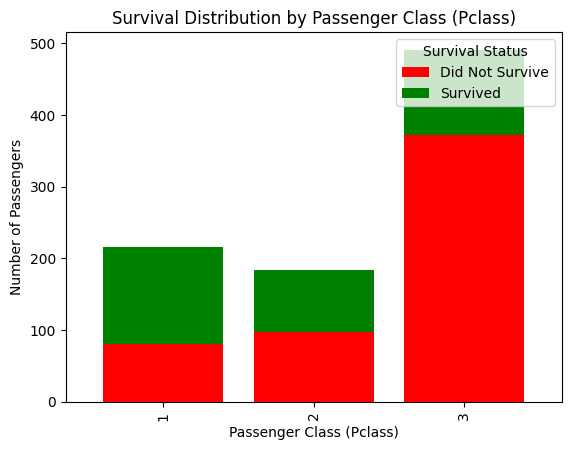

In [20]:
# Group the data by 'Pclass' and 'Survived' and count the occurrences
class_survival_counts = traindata.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)

# Create a stacked bar chart
class_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], width=0.8)

# Title and labels
plt.title('Survival Distribution by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')

# Customize the legend
plt.legend(['Did Not Survive', 'Survived'], loc='upper right', title='Survival Status')

# Show the plot
plt.show()

According to the graph, there is a direct relationship between passenger class and likelihood of survival: first-class passengers have the highest possibilities, second-class passengers have intermediate chances, and third-class passengers have the lowest chances.

 **Temporality**

The Titanic dataset represents a single historical event, the sinking of the RMS Titanic in April 1912. It does not function as a time series dataset, which would monitor events continuously over time. Although the dataset contains data regarding passengers' ages, it lacks precise birthdates or timestamps associated with individual passengers' activities and experiences during their time on the ship.

We are not given any information about the temporality of the data but it seems to capture information about passengers aboard the Titanic on the day the ship sank, namely April 15, 1912. It doesn't include any information about these passengers before or after this event.



**Faithfulness**

In [21]:
# Print unique values for Sex column
print(traindata["Sex"].unique())

['male' 'female']


In [22]:
# Range of age values
print(traindata['Age'].max())
print(traindata['Age'].min())

80.0
0.42


Sex is either Male or Female and Age range is between 0.42 and 80 which is realistic

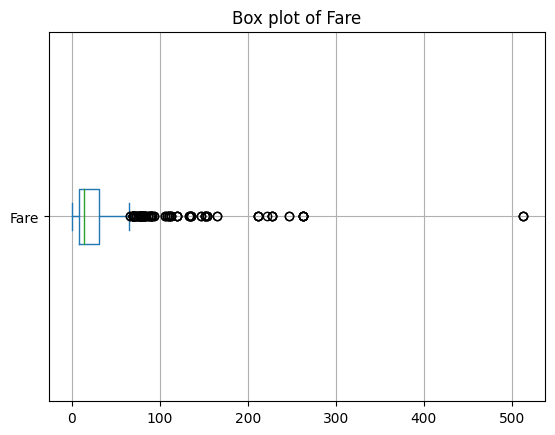

In [23]:
# Box plot of Fare
traindata['Fare'].plot(kind='box', title='Box plot of Fare', grid=True, vert = 0)

plt.show()

The max ticket price is just over $500. The fare price for most of the tickets are between 0 and 100.

In [24]:
# Number of unique names
print(traindata["Name"].nunique())

891


All the names of the passengers are unique so there is no sign of data falsification

In [25]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From the above observations, the titanic dataset seems to be faithful to the original source of data, which is primarily based on passenger manifests and other historical records, as there are no unrealistic or incorrect values.
However, there are some missing values mainly for the Cabin and Age column

### 2.3.4 Data representative and assumption

The data population is all the passengers on the titanic and the problem we want to solve is whether a passenger will survive or not. Since the dataset contains info about passengers on the titanic it is relevant to the problem we want to solve.

The assumption we are making is that the passenger info dataset has all the relevant info for making the prediction which might not be true. For e.g. there is no information about the general wellness of the passenger if they had any illness or health issues. Another assumption we are making is that all the passengers in this dataset actually ended up boarding the titanic, maybe there would be individuals in this dataset who didn't end up going.



### 2.3.5
The Titanic had a total of 1317 passengers, we have records of 1309 passengers. As our dataset is missing only 8 passengers from the data population we can infer that no sampling method has been used to create the dataset.

In [26]:
# calculate the percentage of males and females in training dataset
print(traindata['Sex'].value_counts()['male'] / len(traindata) * 100)
print(traindata['Sex'].value_counts()['female'] / len(traindata) * 100)

64.75869809203144
35.24130190796858


In [27]:
# calculate the percentage of women that survived
traindata.groupby(['Sex'])['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

From a google search, we know that the 37% of passengers on the titanic were women, we also know that 73% of women survived the titanic disaster. Since our training dataset also closely resembles this number, we can infer that random sampling might have been used to split the dataset into training and test

# **Project Stage 2**

In [28]:
# contatenate train and test data so that we can perform data transformation in one go
alldata = pd.concat([traindata, testdata])
alldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 1.2 EDA and Data Transformation


**Data Transformation**

In [29]:
# print the correlation matrix
traindata.corr()

<ipython-input-29-3cbe4d1d4dcd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traindata.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000



Handling missing values-
We have various options to handle missing values like using the median, mode, mean etc. Median and Mode have the advantage of being insensitive to outliers.

1. Age: As we can see from the correlation matrix, Age has a strong negative correlation with PClass. The higher the person's age the more likely they are to be travelling in upper class so we should take the Pclass into consideration when substituting. A good choice would be for each (Age, Pclass) pair substitute it with the median of that Pclass.

2. Embarked: The missing values in the 'Embarked' column are filled with the most frequent port to ensure that the missing values are assigned to the relevant and most common category.

3. Fare: Fare also has a strong negative correlation with Pclass also so we'll substitute each (Fare, Pclass) pair with the median of that Pclass.

In [30]:
# Replace missing age with the median age in each Pclass
median_age = alldata['Age'].median()
alldata['Age'] = alldata.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Replace missing embarked with the most frequent port
port = alldata['Embarked'].dropna().mode()[0]
alldata['Embarked'] = alldata['Embarked'].fillna(port)

# Replace missing fare with the median fare in each Pclass
alldata['Fare'] = alldata.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.median()))

Converting categorical data into numerical as some ML models require that the all inputs to it to be numeric

In order to transform the 'Sex' column into numerical format, 'female' is mapped to 0 and'male' to 1.

In [31]:
alldata['Sex'] = alldata['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

By mapping 'S' to 0, 'C' to 1, and 'Q' to 2, the 'Embarked' column is transformed into numerical format. This conversion now allows the categorical data regarding the port of embarkation to be represented numerically.

In [32]:
alldata['Embarked'] = alldata['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [33]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 132.9+ KB


In [34]:
# Feature engineering
# create a new feature which is a sum of sibling, spouse, parent and children
alldata['FamilySize'] = alldata.SibSp + alldata.Parch+1

def family_group(size):
    a = 0
    if (size <= 1):
        a = 0 #single
    elif (size <= 4):
        a = 1 # small family
    else:
        a = 2 # large family
    return a

# convert family size to categories
alldata['FamilyGroup'] = alldata['FamilySize'].map(family_group)

# create a feature to indicate if a person is travelling alone or not
alldata['IsAlone'] = [1 if i<2 else 0 for i in alldata.FamilySize]


def group_age(age):
    a = 0
    if (age <= 10):
        a = 0 # kids
    elif (age <= 20):
        a = 1 # teenagers
    elif (age <= 35):
        a = 2 # young adult
    elif (age <= 60):
        a = 3 # middle aged
    else:
        a = 4 # old
    return a

# convert age to categories
alldata['AgeGroup'] = alldata['Age'].map(group_age)

In [35]:
# split the dataset back into training and test data
traindata = alldata[alldata['Survived'].notnull()]
testdata = alldata[alldata['Survived'].isnull()]

**Features chosen for modeling**

<ipython-input-36-7506a8367d35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = traindata.corr()


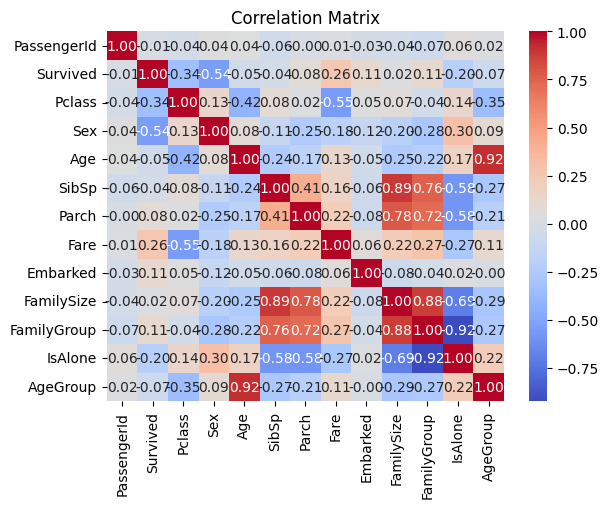

In [36]:
import seaborn as sns
correlation_matrix = traindata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

A correlation matrix is computed for  the training data and heatmap is used to visualize the relationship between numerical features.This step can guide feature selection and provide insights into which variables can be influencial during the prediction of target variable.

Features to be used for modelling:
Pclass , Sex, Fare, Embarked, FamilyGroup, IsAlone, AgeGroup

Reasons behind choosing these features:
1. Pclass: Passenger class may reflect the socio-economic status,potentially influencing their priority to board the lifeboat.
2. Sex: Gender plays an important role in survival as we know from history that women were first boarded onto the lifeboat
3. Fare: The fare paid might again be associated with socio-economic status and thus priority.
4. Embarked: Due to the possibility of socio-economic differences, the port of embarkation might influence survival.
5. FamilyGroup: Family size has a positive impact on survival due to efforts to stay together during evacuation.
6. IsAlone: Similarly being alone has a negative impact on survival
7.Age: Age might be related to survival, with certain age groups more likely being prioritized.


**Readiness of the data**

Our dataset doesn't have any column with outliers so there is no need for data normalization

### 1.3 Modelling

**Model Chosen**

Logistic Regression

Logistic regression is well suited when dealing with a classification problem(predicting some categorical variable) such as predicting survival. It can provide estimated probability of survival for each passenger.

**Features vs. Model**  

In the Logistic Regression model:
P (Survived =1) = 1/1+e-(t0+t1.Pclass+ t2.Sex+ t3.Fare+ t4.Embarked+ t5.FamilyGroup+ t6.IsAlone+ t7.AgeGroup)

Where-
*   t1, t2, t3, t4, t5, t6, t7 are the coefficients learned
during the training of the logistic regression model.
*   Pclass,Sex,Fare,Embarked,FamilyGroup,IsAlone and AgeGroup are the chosen features.

Logistic regression model would learn the weights associated with each of these features to predict the probability of survival of each passenger. This weighted sum is then transformed into a probability value between 0 and 1 using the logistic function.

**Loss function**

Cross-entropy loss

Cross-entropy loss is used to measure the performance of a classification model whose output is a probability value between 0 and 1.

Loss= −ylog(ŷ)+(1−y)log(1−ŷ)

y- survival status (0 for not survived or 1 for survived).

ŷ - predicted probability that the passenger survived.





**Model Estimation**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
cols = [ "Pclass" , "Sex", "Fare", "Embarked", "FamilyGroup","IsAlone","AgeGroup"]
x_train = traindata[cols]
y_train = traindata['Survived']

logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_train)

In [38]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred)
print(train_accuracy)

0.8249158249158249


**Kaggle Submission**

In [39]:
x_test = testdata[cols]

y_test_pred = logistic_model.predict(x_test)

output = pd.DataFrame({'PassengerId': testdata['PassengerId'], 'Survived': y_test_pred})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('submission.csv', index=False)

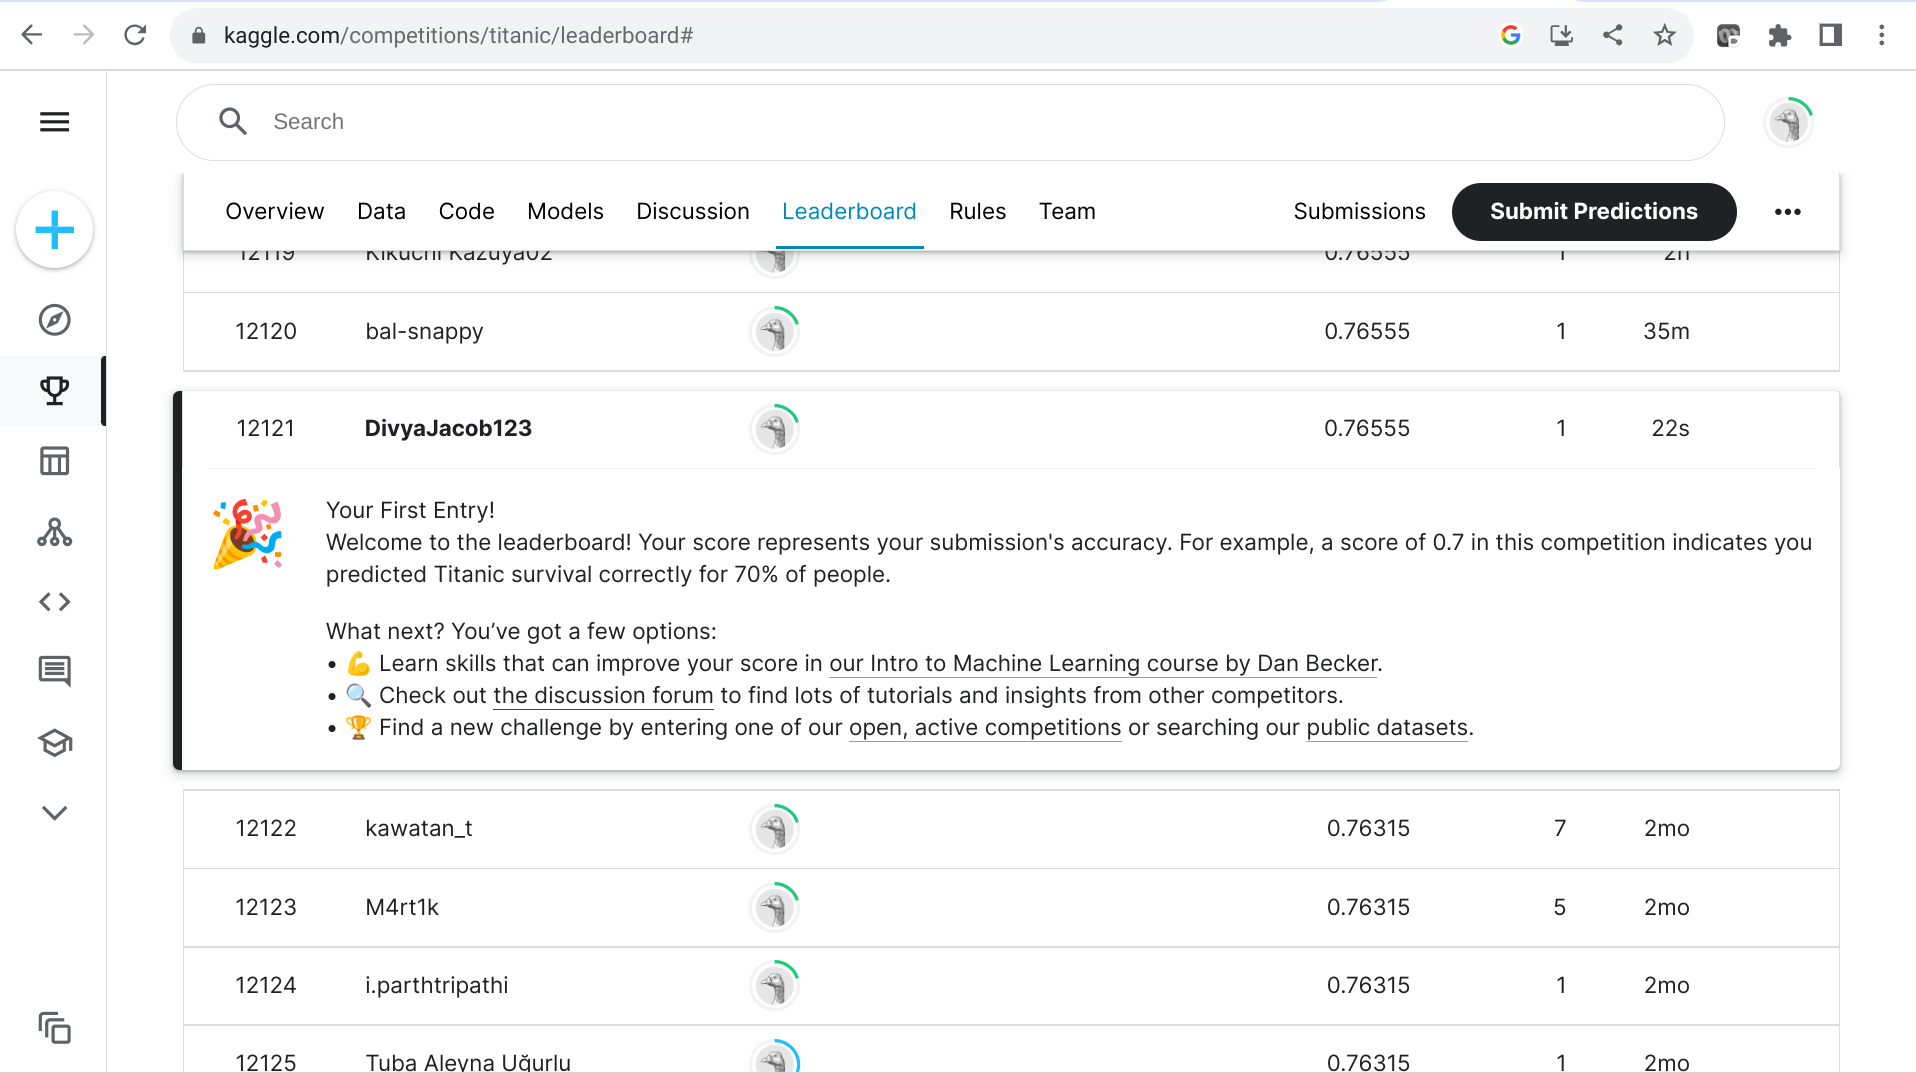

###1.4 Inference

**Evaluation metric for comparison**

Standard evaluation metric used for classification is Accuracy.

**Data splitting**

K-fold split has been used to split the data into training and validation sets for cross validation of the two models. Stratified sampling has been done to ensure balanced splits and Oversampling enables the balancing of training data. For each split, it trains the models on the training data and computes the prediction accuracy on the validation split.

In [40]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

def compute_CV_accuracy(modelA, modelB, X_train, Y_train):
    '''
    Split the training data into 5 subsets.
    For each subset,
        fit models holding out that subset
        compute the accuracy on that subset (the validation set)
    You should be fitting 5 models total.
    Return Accuracies and average accuracy of modelA and modelB

    Args:
        modelA and modelB: sklearn models with fit and predict functions
        X_train (data_frame): Data
        Y_train (data_frame): Label

    Return:
        Accuracy vector containing 5 accuracies for modelA
        Accuracy vector containing 5 accuracies for modelB
        the average accuracy for the 5 splits of modelA
        the average accuracy for the 5 splits of modelB
    '''
    kf = KFold(n_splits=5)
    validation_accuracies_A = []
    validation_accuracies_B = []


    #checking the ratio between positive and negative cases
    distribution = pd.value_counts(Y_train)
    ratio = distribution[1] / distribution[0]
    if ratio <0.9 or ratio > 1.11:
      #using stratified sampling to do the split
      print("Using stratified sampling")
      kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, valid_idx in kf.split(X_train, Y_train):
        # split the data
        split_X_train, split_X_valid =  X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid =  Y_train[train_idx], Y_train[valid_idx]
        #oversampling to enable the training data balancing
        oversampler = RandomOverSampler(random_state=42)
        split_X_train_oversampled, split_Y_train_oversampled = oversampler.fit_resample(split_X_train, split_Y_train)

        # Fit the modelA on the training split
        modelA.fit(split_X_train_oversampled, split_Y_train_oversampled)

        # Compute the prediction accuracy on the validation split
        Y_valid_pred_A = modelA.predict(split_X_valid)
        accuracyA = accuracy_score(split_Y_valid, Y_valid_pred_A)
        validation_accuracies_A.append(accuracyA)

        # Fit the modelB on the training split
        modelB.fit(split_X_train_oversampled, split_Y_train_oversampled)

        # Compute the prediction accuracy on the validation split
        Y_valid_pred_B = modelB.predict(split_X_valid)
        accuracyB = accuracy_score(split_Y_valid, Y_valid_pred_B)

        validation_accuracies_B.append(accuracyB)

    return validation_accuracies_A, np.mean(validation_accuracies_A), validation_accuracies_B, np.mean(validation_accuracies_B)

**Performance comparison**

In [41]:
from xgboost import XGBClassifier

logistic_model = LogisticRegression(max_iter=10000)
xgb_model = XGBClassifier(
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 gamma=0.9,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic')

validation_accuracies_A, mean_validation_accuracies_A, validation_accuracies_B, mean_validation_accuracies_B = compute_CV_accuracy(logistic_model, xgb_model, x_train.values, y_train.values)
print("Mean Accuracy of Model A:", mean_validation_accuracies_A)
print("Mean Accuracy of Model B:", mean_validation_accuracies_B)

Using stratified sampling
Mean Accuracy of Model A: 0.8069612704789405
Mean Accuracy of Model B: 0.828278199736363


In [42]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(validation_accuracies_A, validation_accuracies_B)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.1478273633293985
p-value: 0.06399148914789826


Since the p_value is greater than the significance level of 0.05, the result is not statistically significant. Hence, we can say that there is no evidence to conclude that XGBClassifier is significantly better than the LogisticRegression model.

**Kaggle Submission**

In [43]:
y_test_pred = xgb_model.predict(x_test)

output_xgb = pd.DataFrame({'PassengerId': testdata['PassengerId'], 'Survived': y_test_pred})
output_xgb['Survived'] = output_xgb['Survived'].astype(int)
output_xgb.to_csv('submission_xgb.csv', index=False)

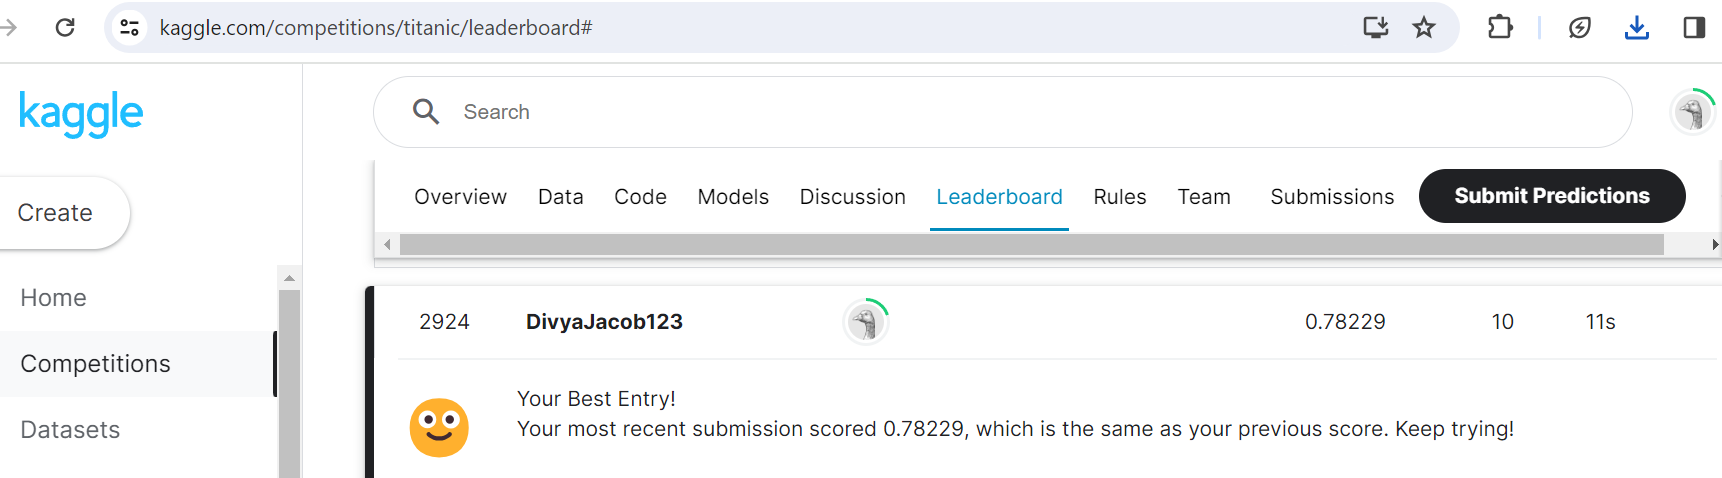

### 1.5 Conclusions and Learnings


**Conclusion about the findings**

In this project, we predicted the chance of survival of passengers on the titanic based on various features. We performed various steps such as data exploration, data transformation and EDA, choosing the model and inference. Based on our findings, we see that certain features such as being a female or certain age groups etc increase the chances of survival on the titanic. We compared two models and the t-test results indicated that there is no significant difference in performance between Logistic Regression and XGBoost hence there is no evidence to prove that one model performs better than the other.

**Learnings from this project**

We learned the importance of data preprocessing,including handling missing values and feature Engineering. We learnt how to choose models based on the problem and comparison between different classification models using Cross-Validation. Additionally, we learned about conducting hypothesis testing(t-test) to statistically compare the model performances. The project helped us to apply the concepts learnt in class in a real-world scenario.

*Credits*:
https://www.kaggle.com/code/imoore/titanic-the-only-notebook-you-need-to-see#Load-Data

**Submission**

In [44]:
!pip install nbconvert

In [47]:
%shell jupyter nbconvert --to html ProjectStage2.ipynb

[NbConvertApp] Converting notebook ProjectStage2.ipynb to html
[NbConvertApp] Writing 1485306 bytes to ProjectStage2.html
